In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("stock_marketing.csv")
df.head()

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,07/17/2023,$193.99,50520160,$191.90,$194.32,$191.81
1,AAPL,07/14/2023,$190.69,41616240,$190.23,$191.1799,$189.63
2,AAPL,07/13/2023,$190.54,41342340,$190.50,$191.19,$189.78
3,AAPL,07-12-2023,$189.77,60750250,$189.68,$191.70,$188.47
4,AAPL,07-11-2023,$188.08,46638120,$189.16,$189.30,$186.60


In [6]:
df["Company"].unique()

array(['AAPL', 'SBUX', 'MSFT', 'CSCO', 'QCOM', 'META', 'AMZN', 'TSLA',
       'AMD', 'NFLX'], dtype=object)

In [7]:
df.columns

Index(['Company', 'Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [18]:
lst = ['Open', 'High', 'Low', 'Close/Last']
for i in lst:
    df[i] = df[i].str.replace('$', '', regex=False).astype('float')
df.head()

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,07/17/2023,193.99,50520160,191.90,194.3200,191.81
1,AAPL,07/14/2023,190.69,41616240,190.23,191.1799,189.63
2,AAPL,07/13/2023,190.54,41342340,190.50,191.1900,189.78
3,AAPL,07-12-2023,189.77,60750250,189.68,191.7000,188.47
4,AAPL,07-11-2023,188.08,46638120,189.16,189.3000,186.60


In [9]:
df.isnull().sum()

Company       0
Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [10]:
df['Close/Last'].dtype

dtype('float64')

In [16]:
# num = df.select_dtypes(include='number')
# for column in num:
#     plt.figure()
#     sns.boxplot(data = df[column])
  

In [11]:
from scipy.stats import zscore

print("before:", df.shape)

# Compute z-score for the whole column
df['Volume'] = zscore(df['Volume'])

# Filter out outliers (threshold = 3)
threshold = 3
filtered_df = df[df['Volume'].abs() < threshold]

print("after:", filtered_df.shape)


before: (25160, 7)
after: (24623, 7)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25160 entries, 0 to 25159
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Company     25160 non-null  object 
 1   Date        25160 non-null  object 
 2   Close/Last  25160 non-null  float64
 3   Volume      25160 non-null  float64
 4   Open        25160 non-null  float64
 5   High        25160 non-null  float64
 6   Low         25160 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.3+ MB


### Kmeans

[[ 1.76132946  0.23271527]
 [ 1.73062497  0.08792577]
 [ 1.73258653  0.08387349]
 ...
 [-1.24399462 -0.27626443]
 [-1.18049507 -0.68860294]
 [-1.1800366  -0.65192928]]


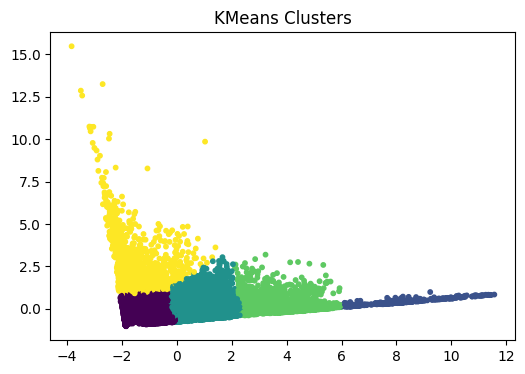

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, OPTICS
from sklearn.mixture import GaussianMixture


# Keep only numeric features for clustering
features = ["Open", "High", "Low", "Close/Last", "Volume"]
X = df[features]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(X_pca)

# ---------------- 1. KMeans ----------------
kmeans = KMeans(n_clusters=5, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)


# ---------------- Visualization ----------------
def plot_clusters(X, labels, title):
    plt.figure(figsize=(6, 4))
    plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=10)
    plt.title(title)
    plt.show()

plot_clusters(X_pca, df['KMeans_Cluster'], "KMeans Clusters")


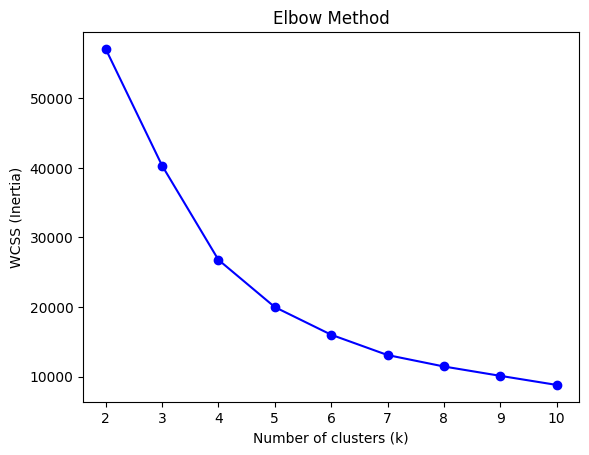

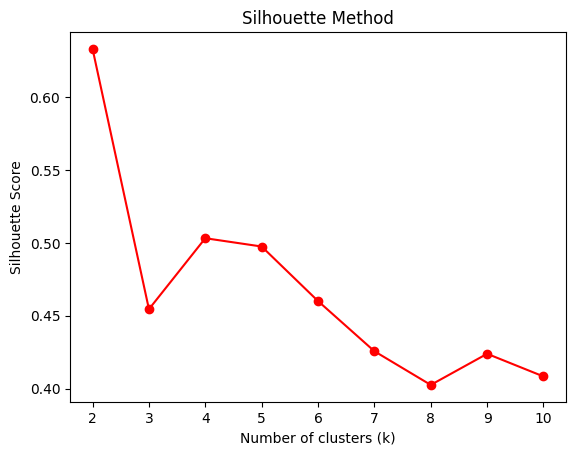

Best k according to Silhouette Score: 2

Cluster Centroids (scaled):
[[-0.33342295 -0.33375596 -0.33319548 -0.33348896  0.05987112]
 [ 2.02965348  2.03168067  2.02826882  2.03005535 -0.36445488]]


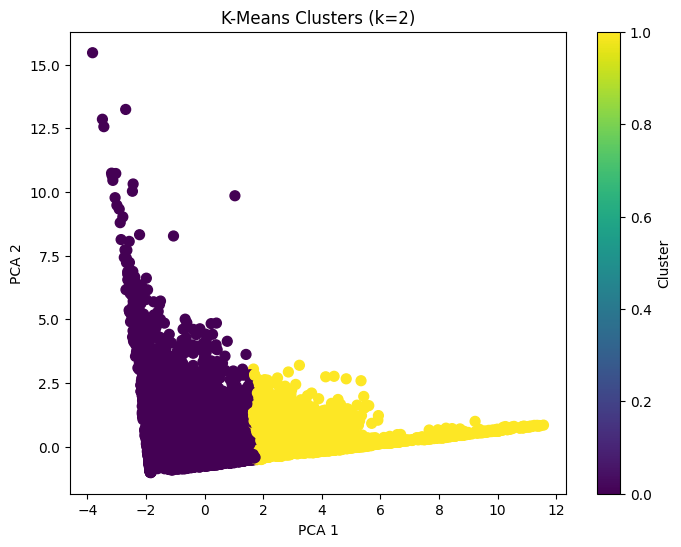

In [23]:
# --------------------------------------
# 1. Import Libraries
# --------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# --------------------------------------
# 2. Load Dataset
# --------------------------------------
# lst = ['Open', 'High', 'Low', 'Close/Last']
# for i in lst:
#     df[i] = df[i].str.replace('$', '', regex=False).astype('float')
# print(df.head())

# Keep only numerical features (e.g., Price, Volume, Returns, Volatility)
# X = df.select_dtypes(include=['float64', 'int64'])
features = ["Open", "High", "Low", "Close/Last", "Volume"]
X = df[features]

# --------------------------------------
# 3. Data Preprocessing
# --------------------------------------
# Handle missing values if any
X = X.fillna(X.mean())

# Standardize (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --------------------------------------
# 4. Find Best Number of Clusters (k)
# --------------------------------------
wcss = []
sil_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    wcss.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

# Plot Elbow Method
plt.plot(K, wcss, 'bo-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method")
plt.show()

# Plot Silhouette Scores
plt.plot(K, sil_scores, 'ro-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")
plt.show()

best_k = K[sil_scores.index(max(sil_scores))]
print("Best k according to Silhouette Score:", best_k)

# --------------------------------------
# 5. Apply K-Means with Best k
# --------------------------------------
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print("\nCluster Centroids (scaled):")
print(kmeans.cluster_centers_)

# --------------------------------------
# 6. Visualize Clusters in 2D (PCA)
# --------------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Cluster'], cmap='viridis', s=50)
plt.title(f"K-Means Clusters (k={best_k})")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
# plt.show()

# # --------------------------------------
# # 7. Analyze the Clusters
# # --------------------------------------
# print(df.groupby("Cluster").mean())


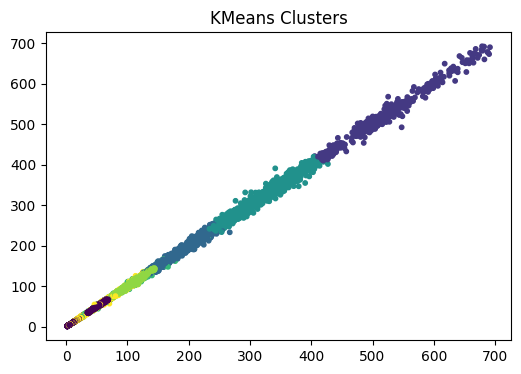

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(df["Close/Last"], df["Open"], c=df['KMeans_Cluster'], cmap='viridis', s=10)
plt.title("KMeans Clusters")
plt.show()

In [25]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
pd.DataFrame(cluster_centers, columns=features)


,Open,High,Low,Close/Last,Volume
0,68.423592,69.276396,67.554036,68.443557,5.514880e+07
1,309.443417,314.164056,304.639732,309.499893,2.799612e+07


### Agglomerative

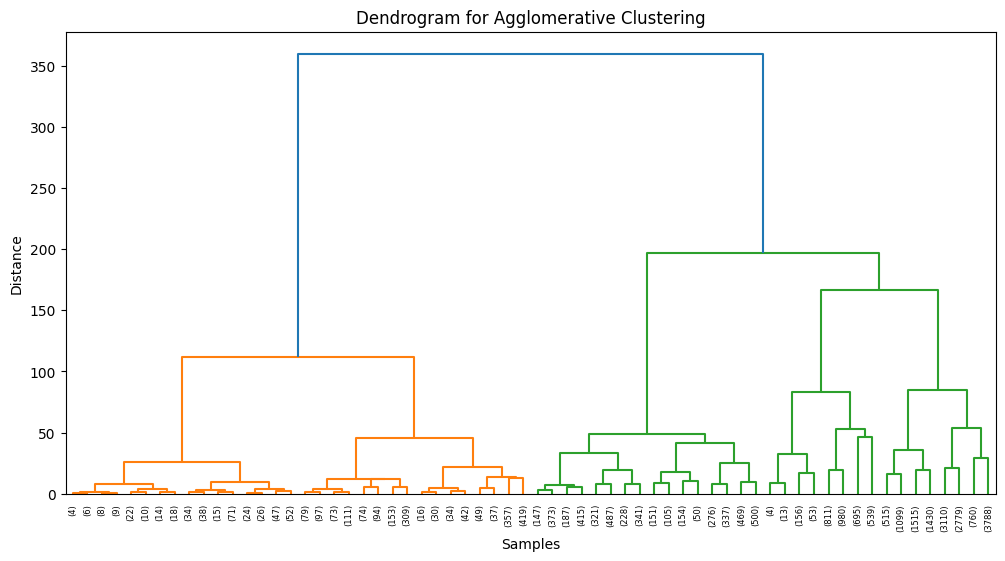

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering
Z = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=5)  # p controls how deep to show
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


In [ ]:
import scipy.cluster.hierarchy as shc
plt.Figure(figsize=(10,7))
plt.title("SeconD Dendogram")
dend = shc.dendrogram(shc.linkage(X_scaled,method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean')

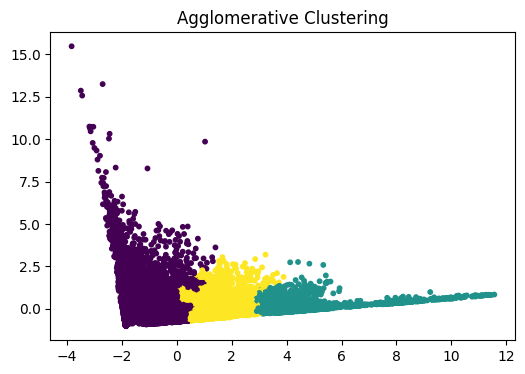

In [38]:
agglo = AgglomerativeClustering(n_clusters=3)
df['Agglo_Cluster'] = agglo.fit_predict(X_scaled)

plot_clusters(X_pca, df['Agglo_Cluster'], "Agglomerative Clustering")

### DBSCAN

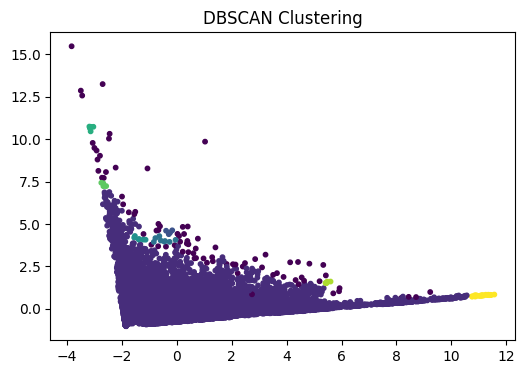

In [46]:
dbscan = DBSCAN(eps=0.25, min_samples=4)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

plot_clusters(X_pca, df['DBSCAN_Cluster'], "DBSCAN Clustering")

In [39]:
import numpy as np

# Cluster labels
labels = df['DBSCAN_Cluster']

# Number of clusters (ignoring noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters)

# Number of noise points
n_noise = list(labels).count(-1)
print("Number of noise points:", n_noise)


Number of clusters: 7
Number of noise points: 8


In [40]:
from sklearn.metrics import silhouette_score

mask = df['DBSCAN_Cluster'] != -1
score = silhouette_score(X_scaled[mask], df['DBSCAN_Cluster'][mask])
print("Silhouette Score:", score)

Silhouette Score: 0.5096410329447246


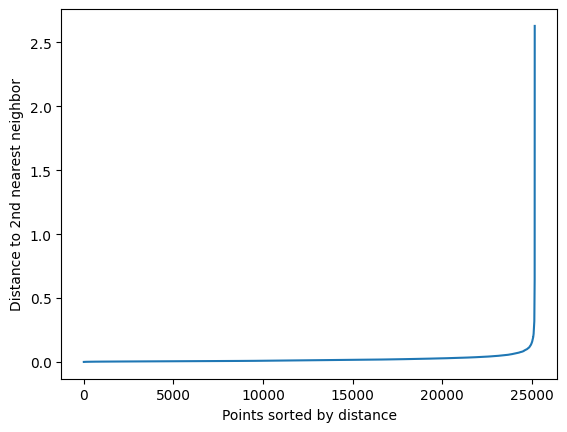

In [ ]:
#for finding best eps

from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:,1])  # 2nd nearest
plt.plot(distances)
plt.ylabel("Distance to 2nd nearest neighbor")
plt.xlabel("Points sorted by distance")
plt.show()

###  OPTICS

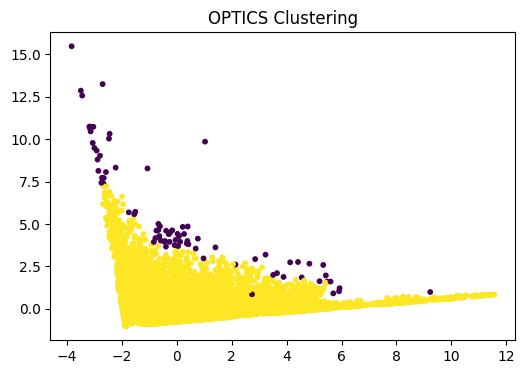

In [ ]:
optics = OPTICS(min_samples=10, xi=0.01, min_cluster_size=0.05)
df['OPTICS_Cluster'] = optics.fit_predict(X_scaled)

plot_clusters(X_pca, df['OPTICS_Cluster'], "OPTICS Clustering")

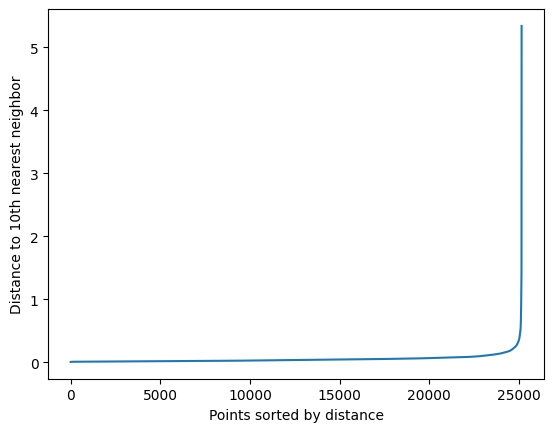

In [50]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

neighbors = NearestNeighbors(n_neighbors=10)  # try different n_neighbors
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, -1])  # distance to 10th neighbor
plt.plot(distances)
plt.ylabel("Distance to 10th nearest neighbor")
plt.xlabel("Points sorted by distance")
plt.show()


###  Gaussian Mixture Model

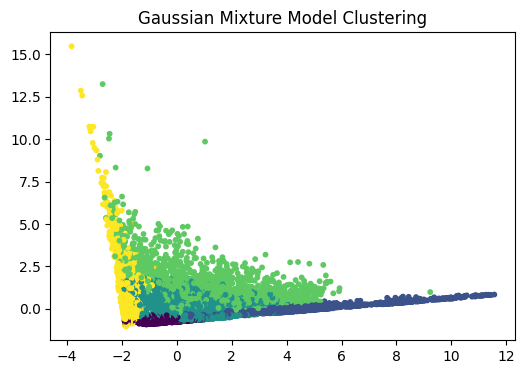

In [18]:
gmm = GaussianMixture(n_components=5, random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(X_scaled)

plot_clusters(X_pca, df['GMM_Cluster'], "Gaussian Mixture Model Clustering")

In [21]:
df.head()

,Company,Date,Close/Last,Volume,Open,High,Low,z_volume,KMeans_Cluster,Agglo_Cluster,DBSCAN_Cluster,OPTICS_Cluster,GMM_Cluster
0,AAPL,07/17/2023,193.99,50520160,191.90,194.3200,191.81,-0.012463,9,2,0,0,2
1,AAPL,07/14/2023,190.69,41616240,190.23,191.1799,189.63,-0.151608,9,2,0,0,2
2,AAPL,07/13/2023,190.54,41342340,190.50,191.1900,189.78,-0.155888,9,2,0,0,2
3,AAPL,07-12-2023,189.77,60750250,189.68,191.7000,188.47,0.147407,9,2,0,0,2
4,AAPL,07-11-2023,188.08,46638120,189.16,189.3000,186.60,-0.073129,9,2,0,0,2


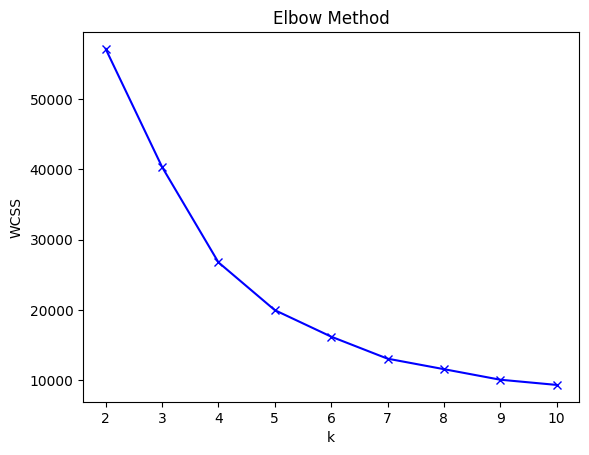

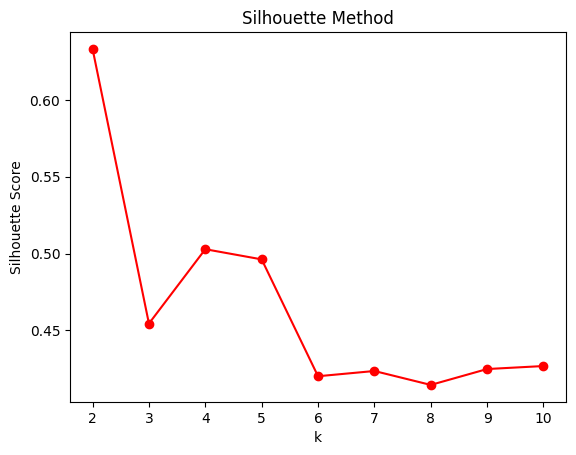

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

wcss = []
sil_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia = WCSS
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Method
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

# Plot Silhouette Scores
plt.plot(K, sil_scores, 'ro-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()


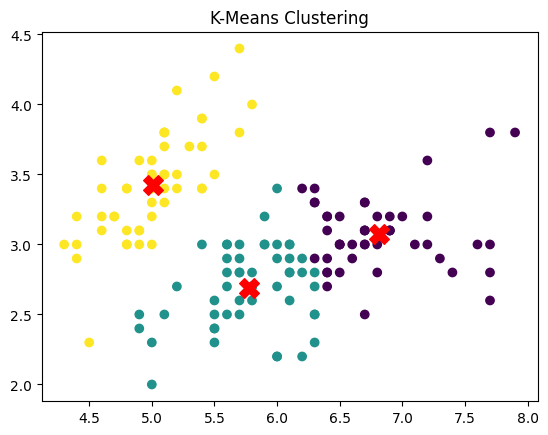

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
 
# Load dataset
iris = load_iris()
X = iris.data[:, :2]  # Only first two features for visualization
 
# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)
 
plt.scatter(X[:,0], X[:,1], c=y_kmeans, cmap="viridis")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            s=200, c="red", marker="X")
plt.title("K-Means Clustering")
plt.show()